<a href="https://colab.research.google.com/github/MuhammedAshraf2020/ResNet50/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import kaggle json file
import google.colab as gc
gc.files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedashraf2020","key":"1a3adc9c255e74902c506c088910458d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats

 95% 258M/271M [00:03<00:00, 59.4MB/s]
100% 271M/271M [00:03<00:00, 72.3MB/s]
 98% 532M/543M [00:04<00:00, 164MB/s]
100% 543M/543M [00:04<00:00, 127MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.2MB/s]


In [3]:
from zipfile import ZipFile
file_name = "train.zip"

with ZipFile(file_name , "r") as Zip:
  Zip.extractall()
  print("Done")

Done


In [4]:
import os

In [5]:
photos_names = os.listdir("train")

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
X_train = list()
y_train = list()

for photo in photos_names:
  Image = plt.imread("train/"+photo)
  Image = cv2.resize(Image , (64 , 64))
  X_train.append(Image)
  if "cat" in photo:
    y_train.append(0)
  else:
    y_train.append(1)

In [80]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(25000, 64, 64, 3)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train , X_test , y_train , y_test = train_test_split(X_train , y_train)

In [62]:
import ResNet50  as RS50

In [107]:
model = RS50.ResNet50(input_shape = (64 , 64 , 3) , classes = 2)

In [ ]:
model.summary()

In [108]:
model.compile(optimizer = "adam" , loss = "SparseCategoricalCrossentropy" , metrics = ["accuracy"])

In [109]:
hist = model.fit(X_train , y_train , epochs = 50  , batch_size = 100 , validation_data=(X_test , y_test))

Epoch 1/50
188/188 [==============================] - 13s 67ms/step - loss: 1.0113 - accuracy: 0.6359 - val_loss: 0.6084 - val_accuracy: 0.6686
Epoch 2/50
188/188 [==============================] - 12s 63ms/step - loss: 0.5238 - accuracy: 0.7421 - val_loss: 0.6455 - val_accuracy: 0.6818
Epoch 3/50
188/188 [==============================] - 12s 63ms/step - loss: 0.4335 - accuracy: 0.7994 - val_loss: 0.5771 - val_accuracy: 0.7085
Epoch 4/50
188/188 [==============================] - 12s 63ms/step - loss: 0.3720 - accuracy: 0.8337 - val_loss: 0.8600 - val_accuracy: 0.6523
Epoch 5/50
188/188 [==============================] - 12s 63ms/step - loss: 0.3162 - accuracy: 0.8641 - val_loss: 0.6089 - val_accuracy: 0.7427
Epoch 6/50
188/188 [==============================] - 12s 63ms/step - loss: 0.2757 - accuracy: 0.8838 - val_loss: 0.8551 - val_accuracy: 0.6683
Epoch 7/50
188/188 [==============================] - 12s 64ms/step - loss: 0.2365 - accuracy: 0.9022 - val_loss: 0.5375 - val_accuracy:

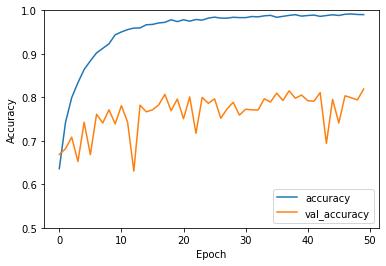

In [110]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [111]:
model.evaluate(X_test ,  y_test , verbose=2)

196/196 - 2s - loss: 0.9813 - accuracy: 0.8192


[0.9812730550765991, 0.8191999793052673]